In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
data = pd.read_csv('/content/National Parks Dataset for Stats.csv')
park_name = 'Yellowstone National Park'
park_data = data[data['area_name'] == park_name]

years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']
visits = park_data[years].values[0]
train_size = int(len(visits) * 0.8)
train, test = visits[:train_size], visits[train_size:]

#ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_results = arima_model.fit()
arima_predictions = arima_results.forecast(steps=len(test))

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))
print(f'ARIMA RMSE: {arima_rmse:.2f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA RMSE: 99018.89


In [11]:
#data_prep for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 3
train_data = train.reshape(-1, 1)
test_data = test.reshape(-1, 1)
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

#LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(X_test)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM RMSE: {lstm_rmse:.2f}')

1/1 [==============================] - 1s 1s/step
LSTM RMSE: 2868102.22


ARIMA RMSE: 99018.89
LSTM RMSE: 2868102.22


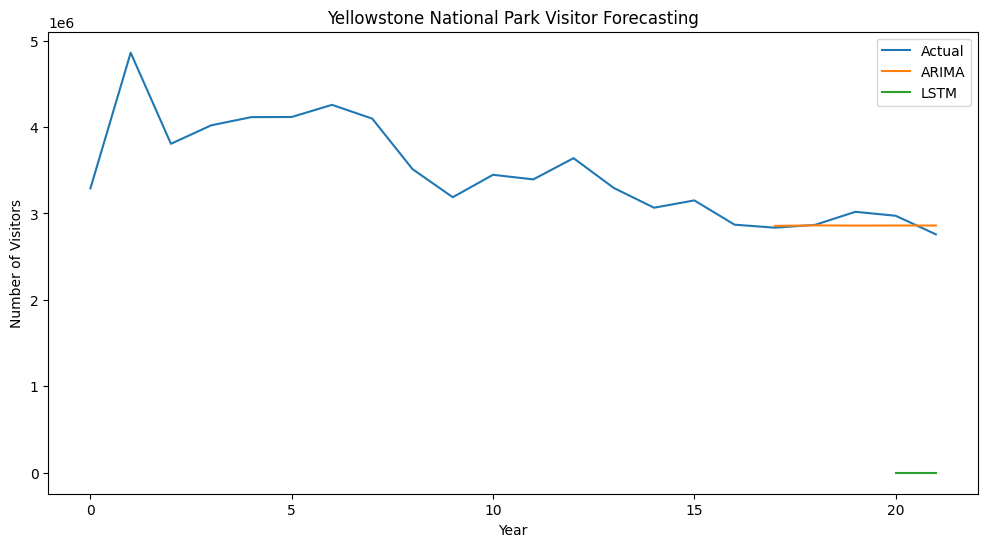

In [14]:
import matplotlib.pyplot as plt
# ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))
print(f'ARIMA RMSE: {arima_rmse:.2f}')
# LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM RMSE: {lstm_rmse:.2f}')
years_range = range(len(visits))
plt.figure(figsize=(12, 6))
plt.plot(years_range, visits, label='Actual')
arima_pred_range = range(len(train), len(train) + len(test))
lstm_pred_range = range(len(train) + look_back, len(train) + look_back + len(lstm_predictions))
plt.plot(lstm_pred_range, lstm_predictions, label='LSTM')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Yellowstone National Park Visitor Forecasting')
plt.legend()
plt.show()

LSTM RMSE: 2868102.22
1/1 [==============================] - 0s 31ms/step


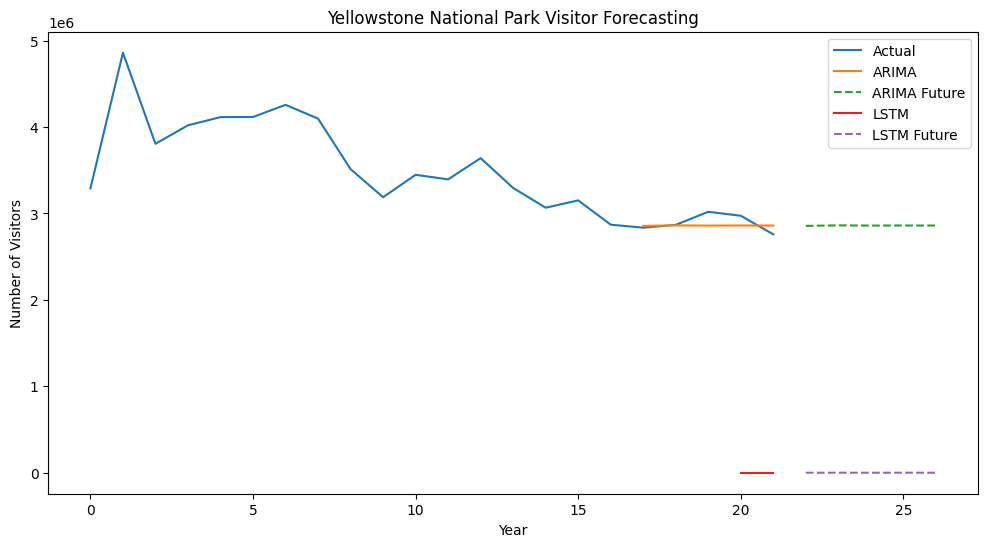

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM RMSE: {lstm_rmse:.2f}')
arima_future_predictions = arima_results.forecast(steps=5)
lstm_future_input = visits[-look_back:].reshape(1, look_back, 1)
lstm_future_predictions = []
for _ in range(5):
    prediction = lstm_model.predict(lstm_future_input)[0]
    lstm_future_predictions.append(prediction[0])
    lstm_future_input = np.append(lstm_future_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)


years_range = range(len(visits))
future_years_range = range(len(visits), len(visits) + 5)
plt.figure(figsize=(12, 6))
plt.plot(years_range, visits, label='Actual')
arima_pred_range = range(len(train), len(visits))
plt.plot(arima_pred_range, arima_predictions, label='ARIMA')
plt.plot(future_years_range, arima_future_predictions, linestyle='--', label='ARIMA Future')
lstm_pred_range = range(len(train) + look_back, len(visits))
plt.plot(lstm_pred_range, lstm_predictions, label='LSTM')
plt.plot(future_years_range, lstm_future_predictions, linestyle='--', label='LSTM Future')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Yellowstone National Park Visitor Forecasting')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


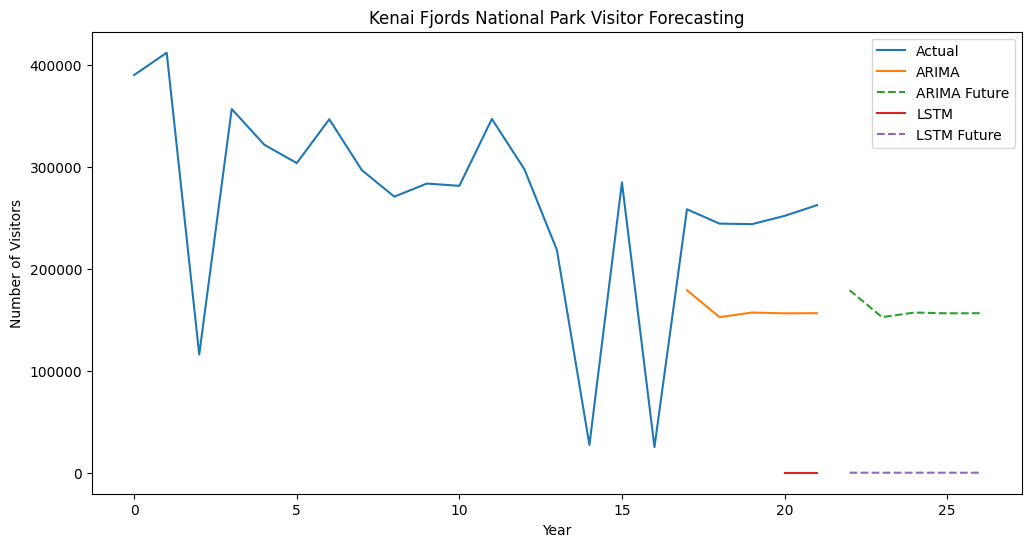

1/1 [==============================] - 0s 23ms/step


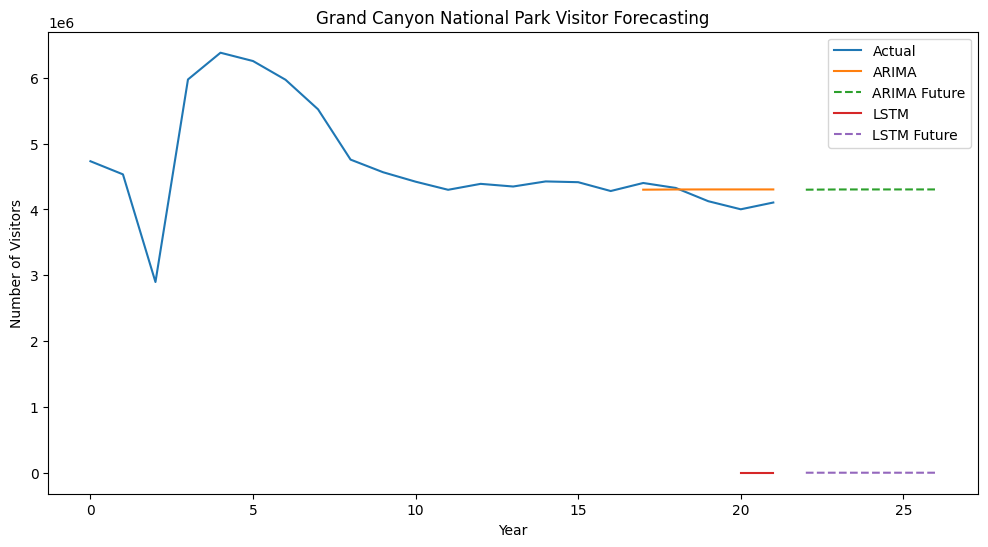

1/1 [==============================] - 0s 21ms/step


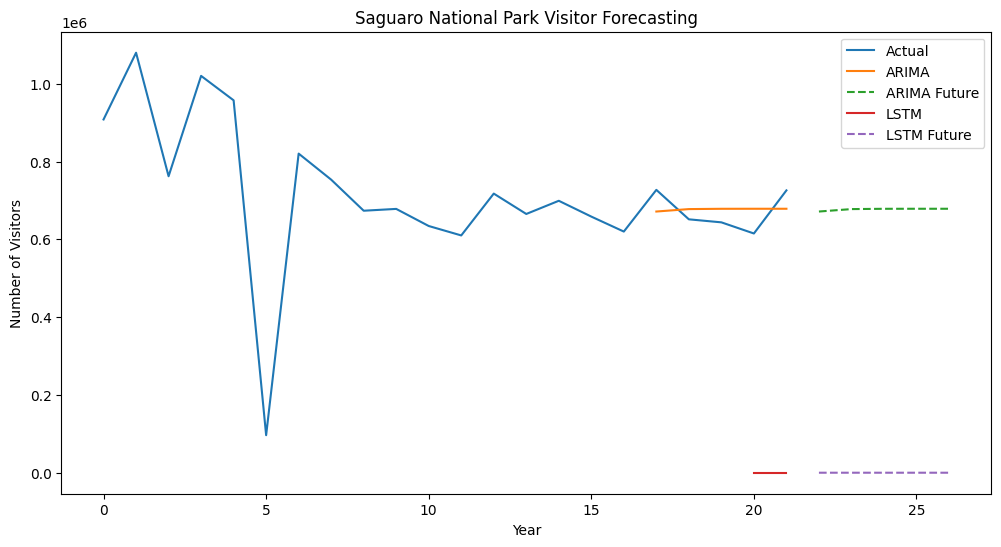

1/1 [==============================] - 0s 23ms/step


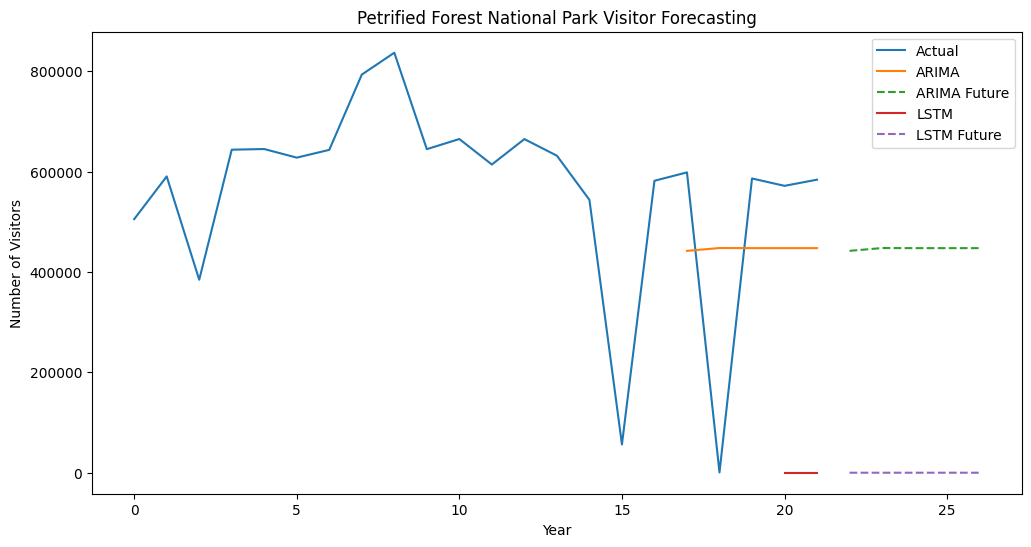

1/1 [==============================] - 0s 23ms/step


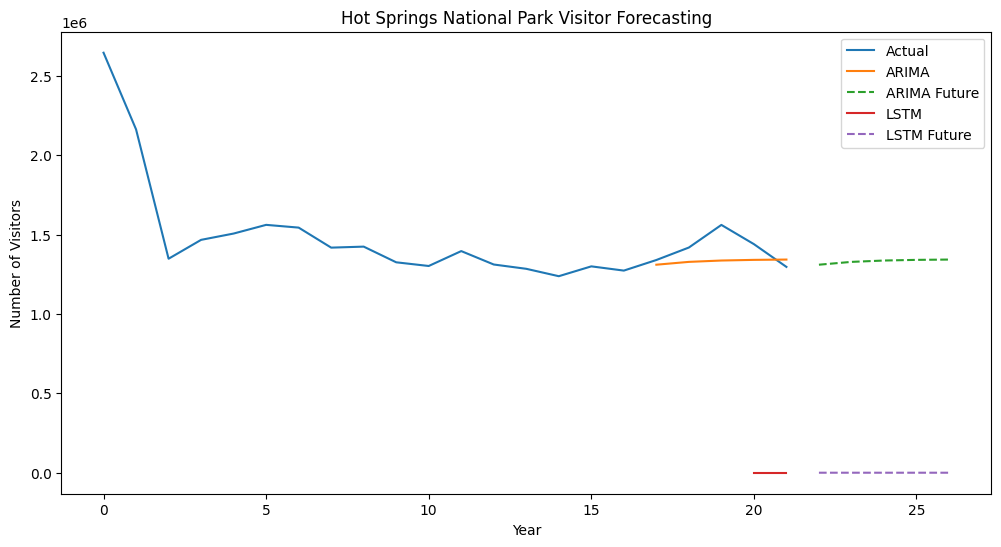

1/1 [==============================] - 0s 19ms/step


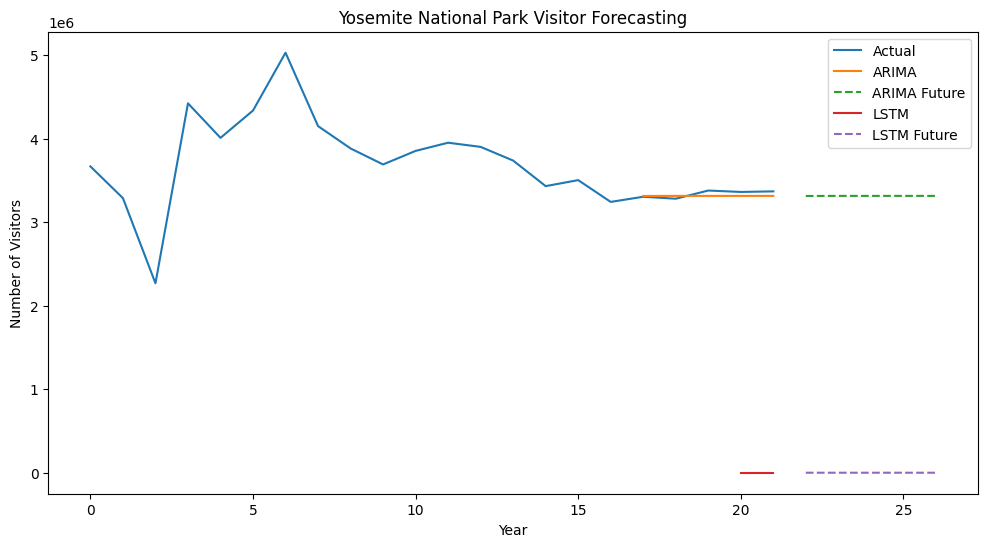

1/1 [==============================] - 0s 22ms/step


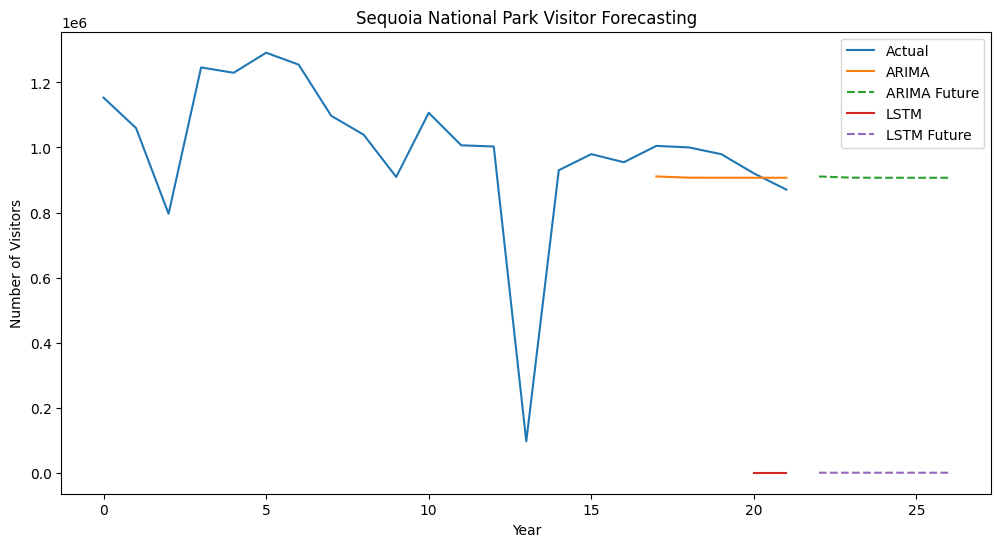

1/1 [==============================] - 0s 24ms/step


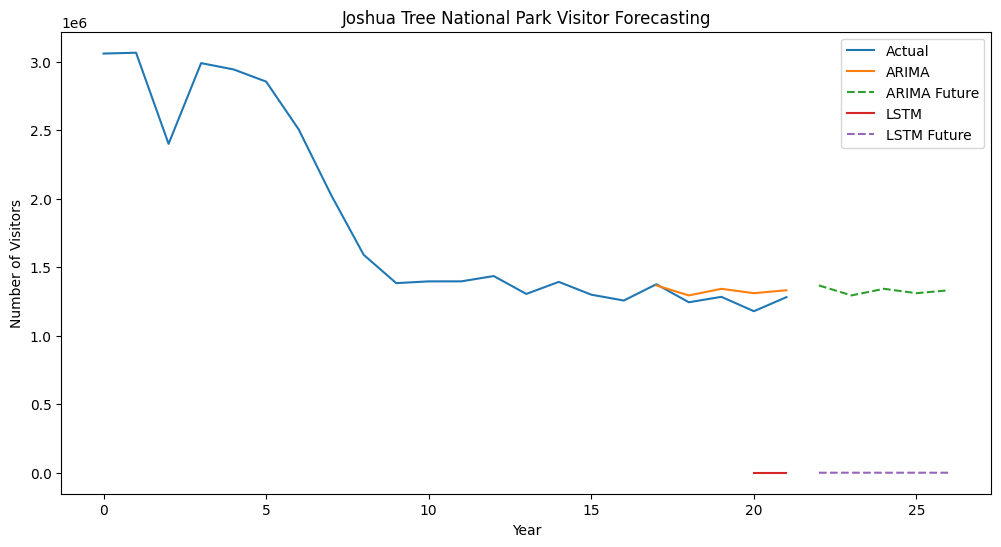

1/1 [==============================] - 0s 24ms/step


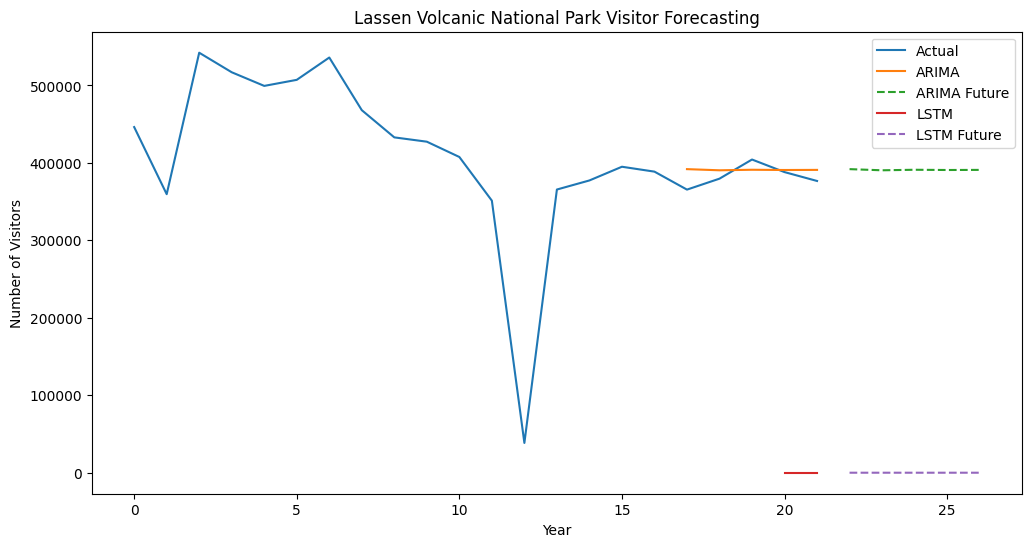

1/1 [==============================] - 0s 20ms/step


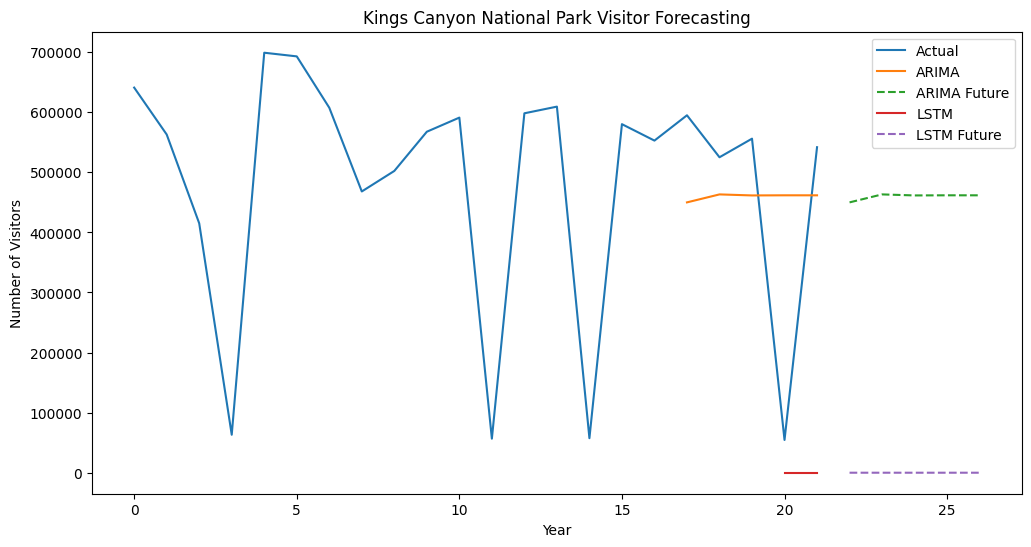

1/1 [==============================] - 0s 24ms/step


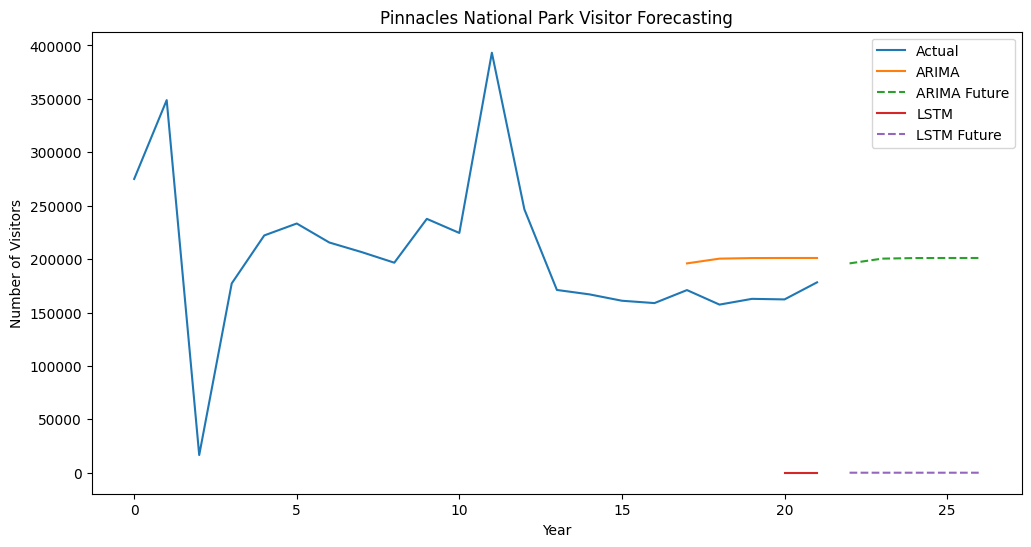

1/1 [==============================] - 0s 22ms/step


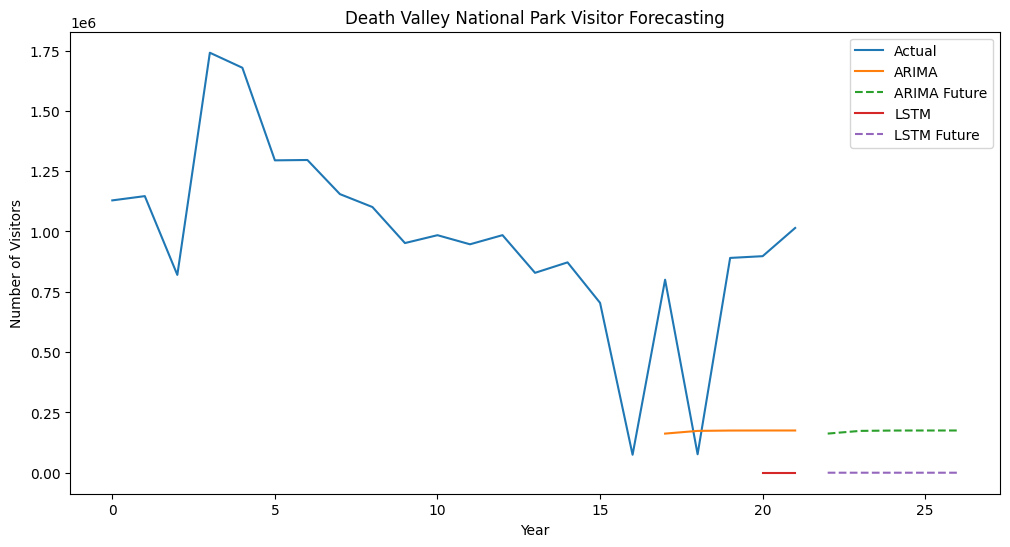

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 31ms/step


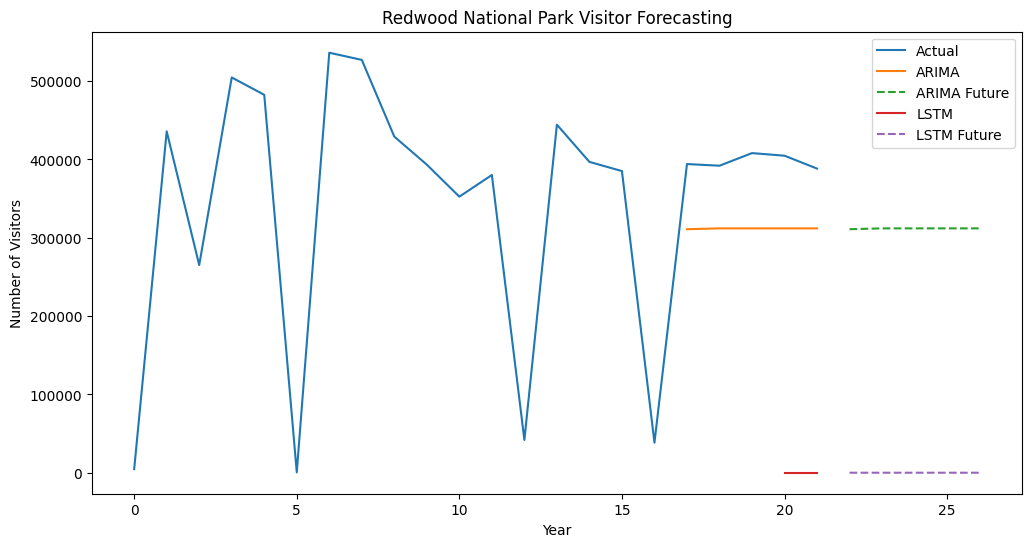

1/1 [==============================] - 0s 23ms/step


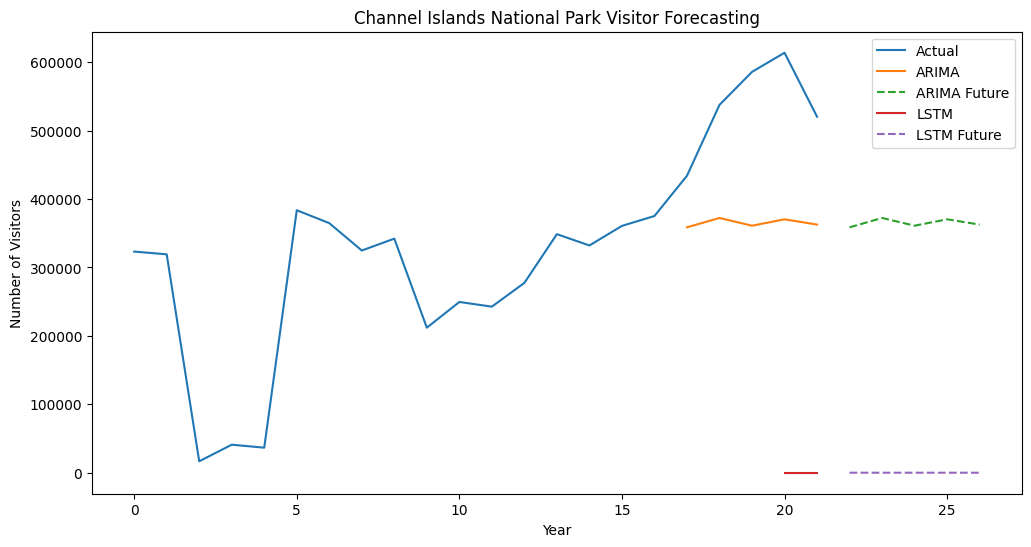

1/1 [==============================] - 0s 27ms/step


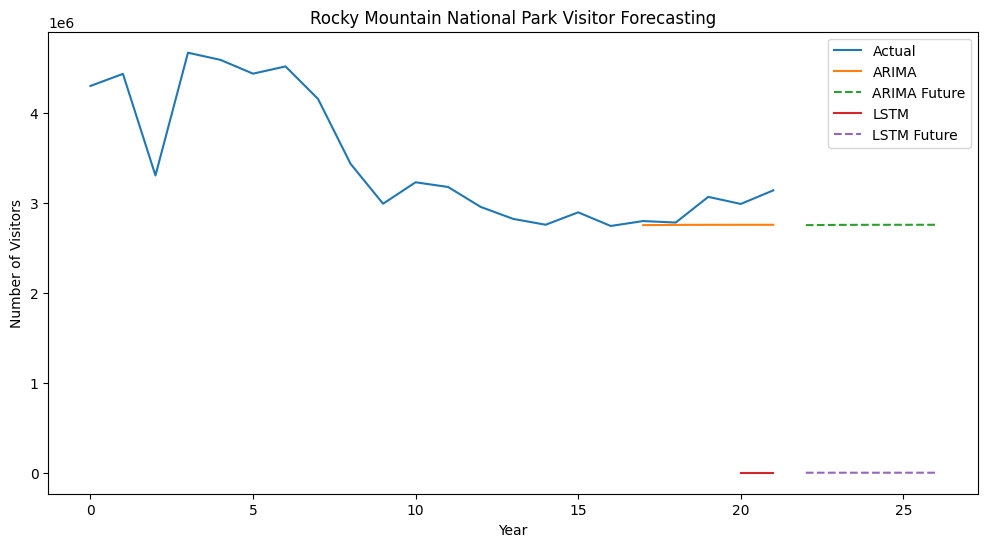

1/1 [==============================] - 0s 33ms/step


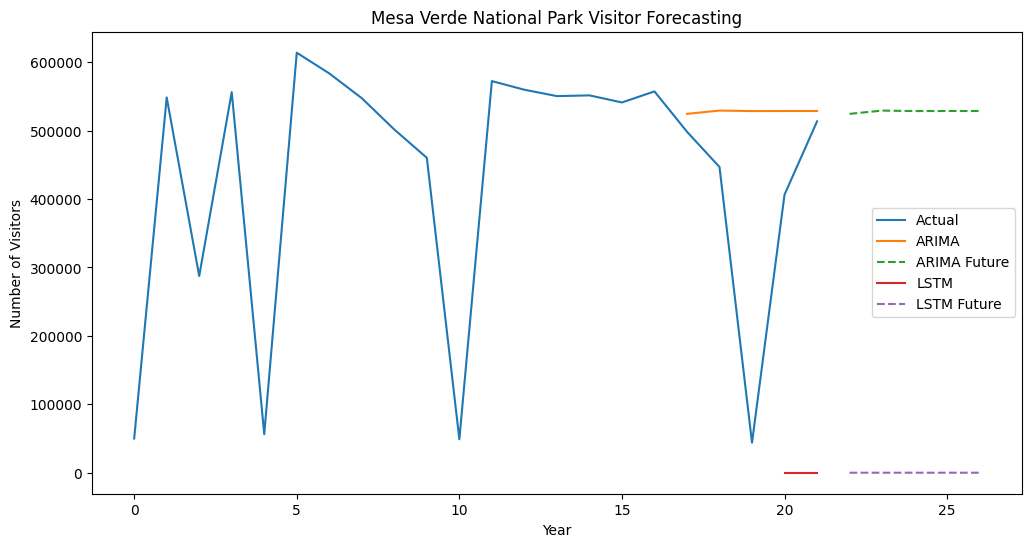

1/1 [==============================] - 0s 24ms/step


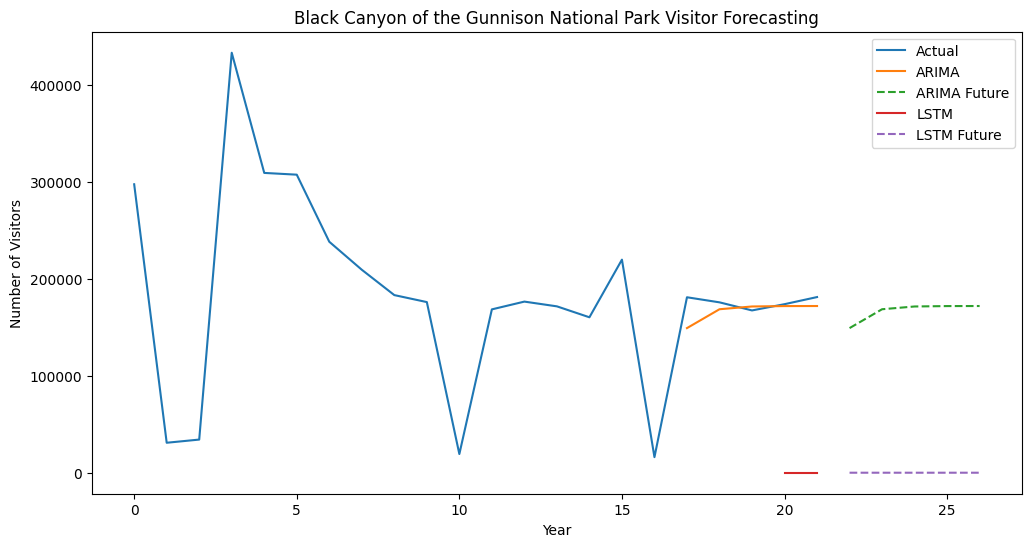

1/1 [==============================] - 0s 23ms/step


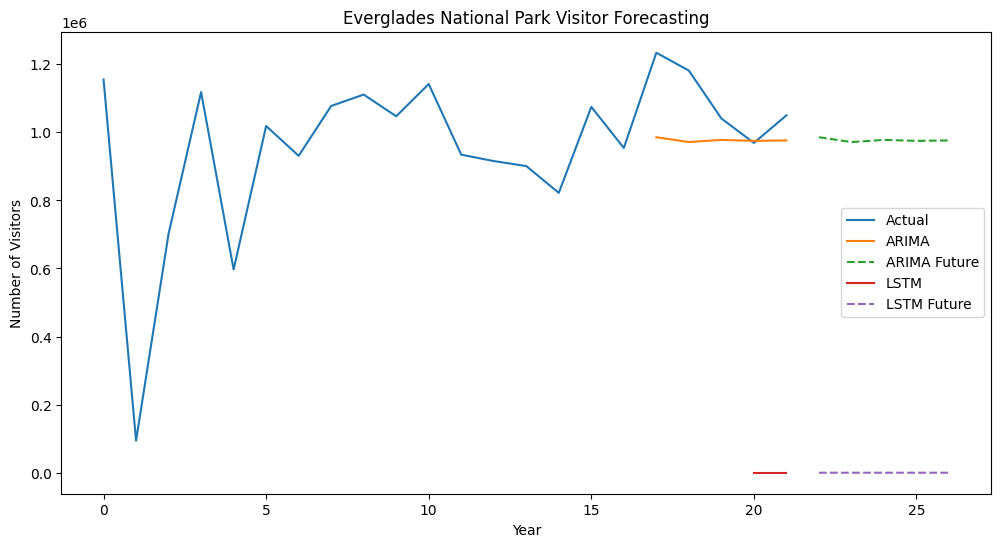

1/1 [==============================] - 0s 28ms/step


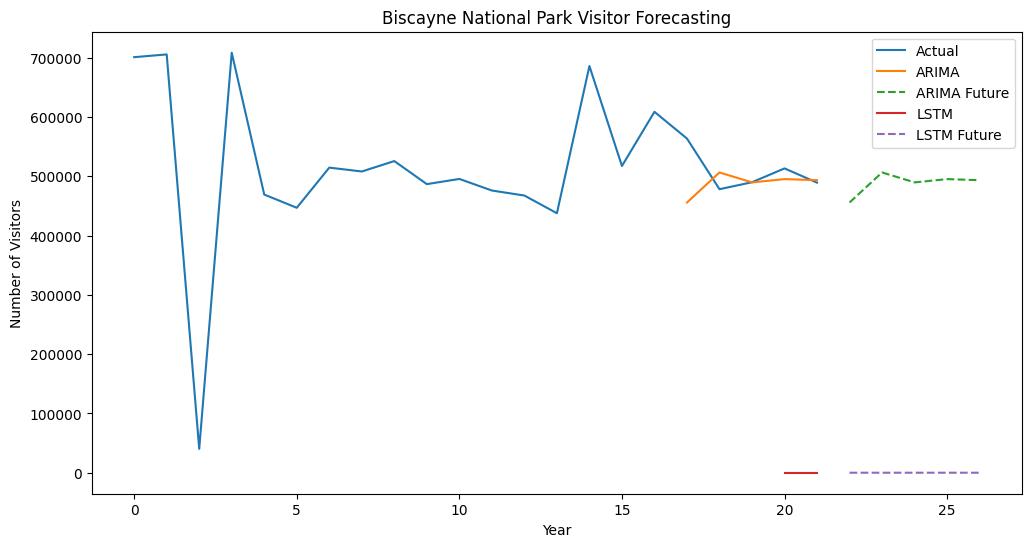

1/1 [==============================] - 0s 22ms/step


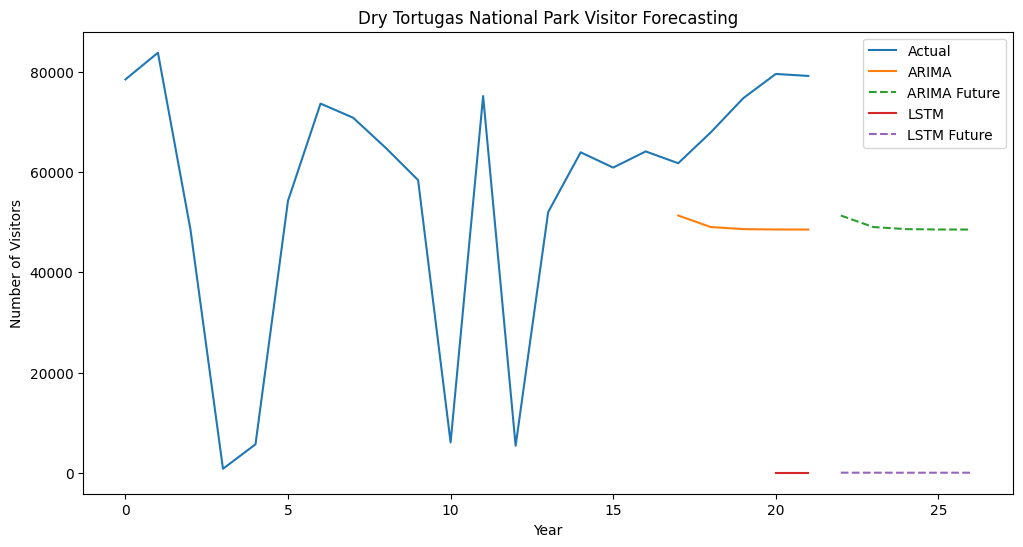

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1/1 [==============================] - 0s 27ms/step


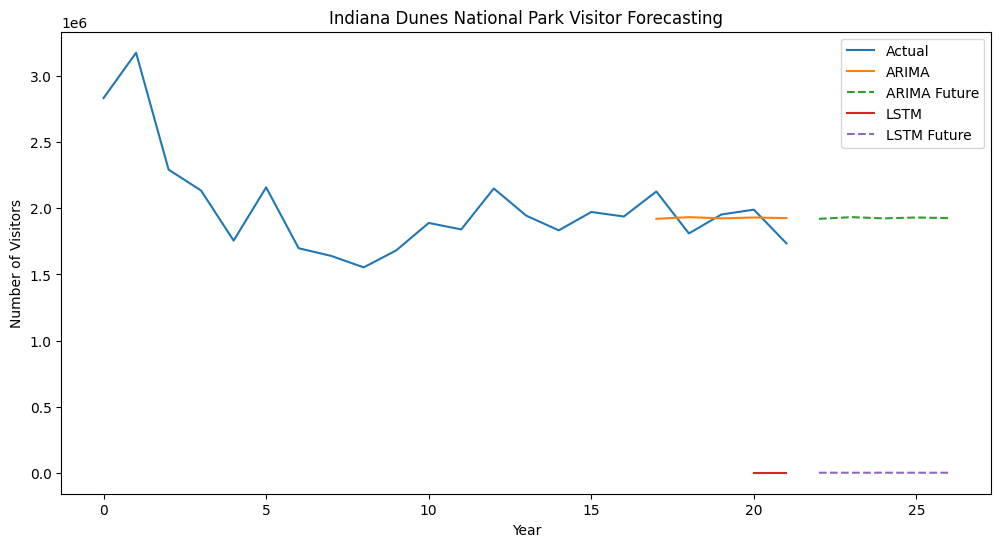

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 21ms/step


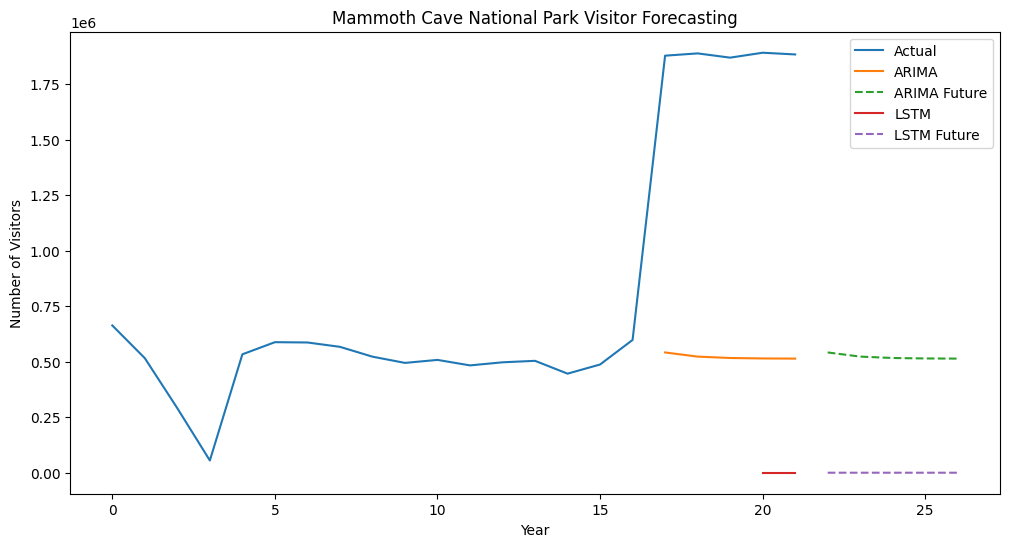

1/1 [==============================] - 0s 33ms/step


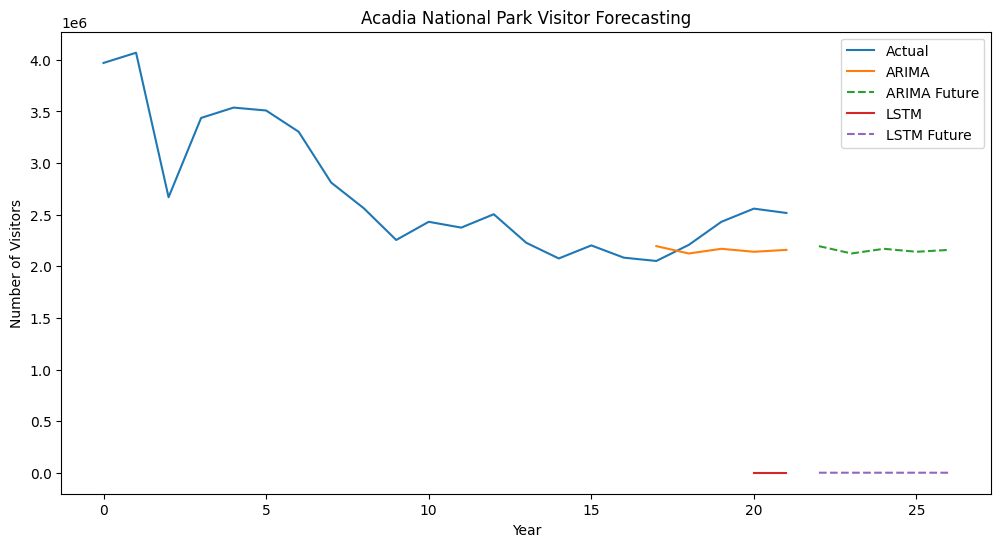

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 25ms/step


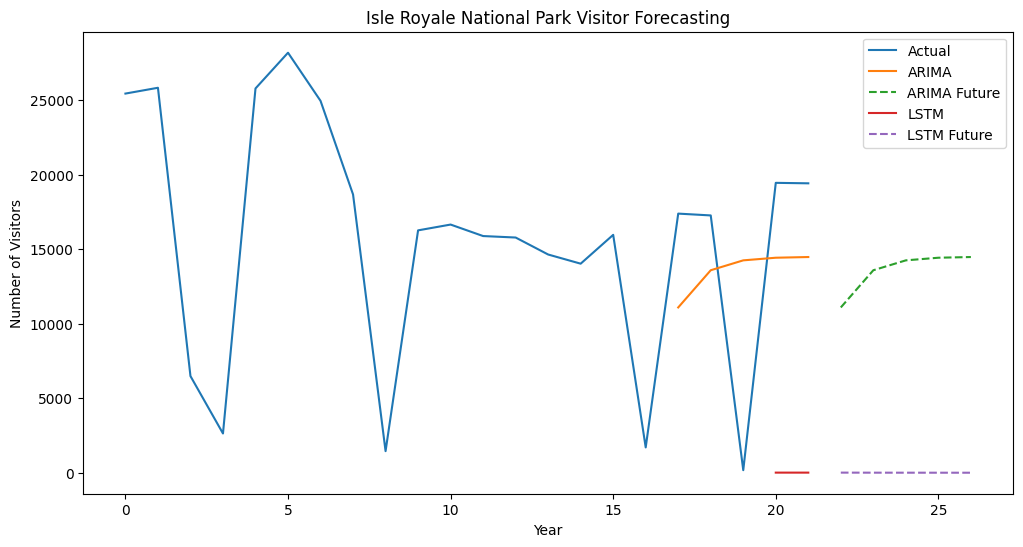

1/1 [==============================] - 0s 28ms/step


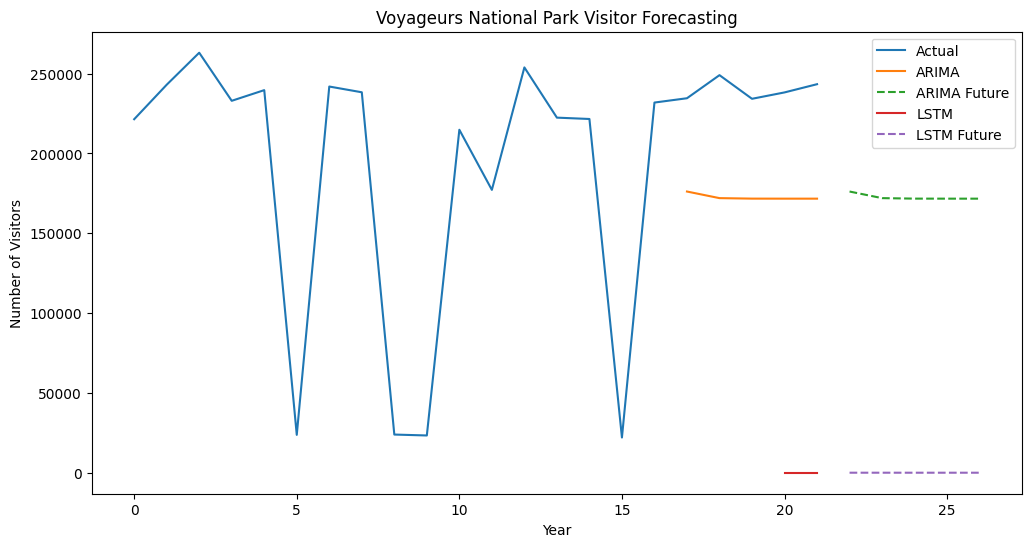

1/1 [==============================] - 0s 20ms/step


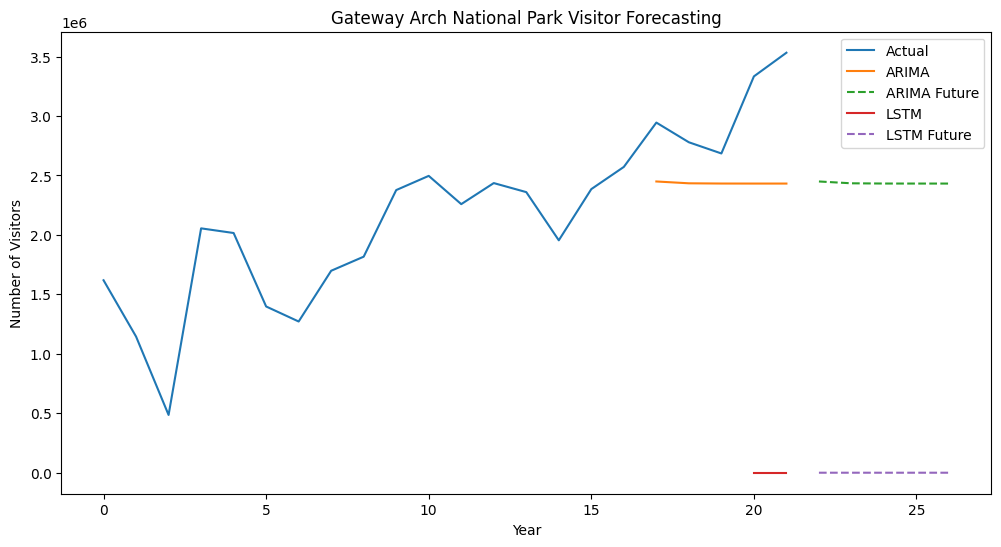

1/1 [==============================] - 0s 23ms/step


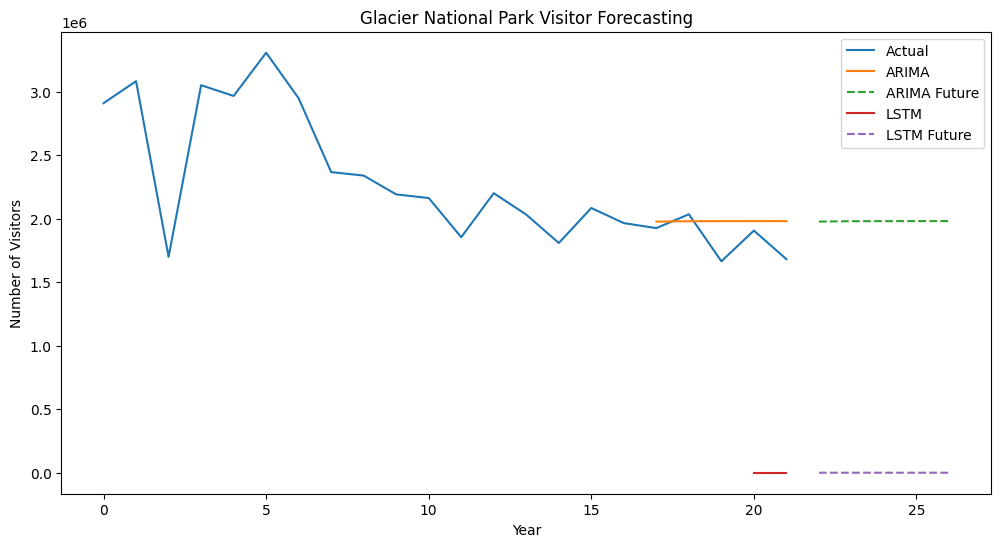

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 21ms/step


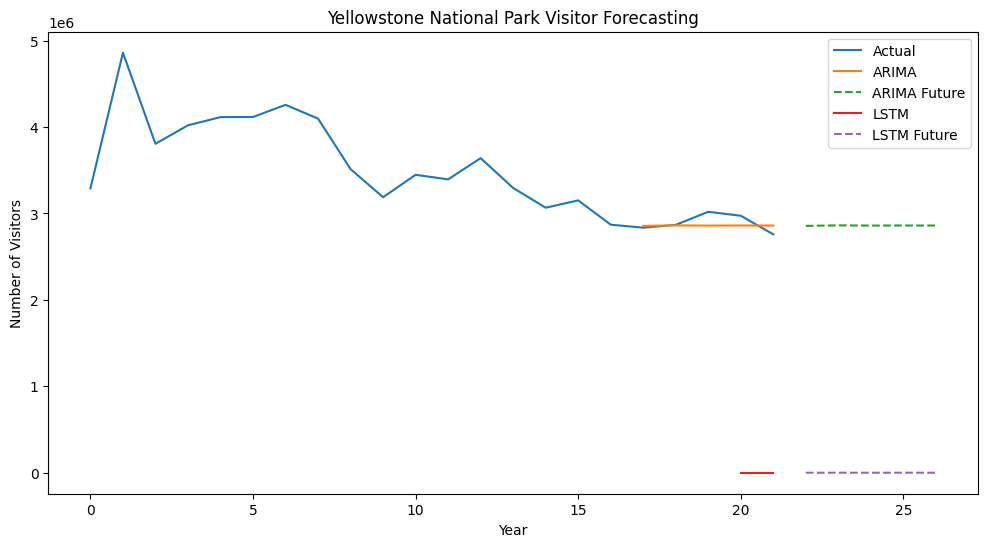

1/1 [==============================] - 0s 25ms/step


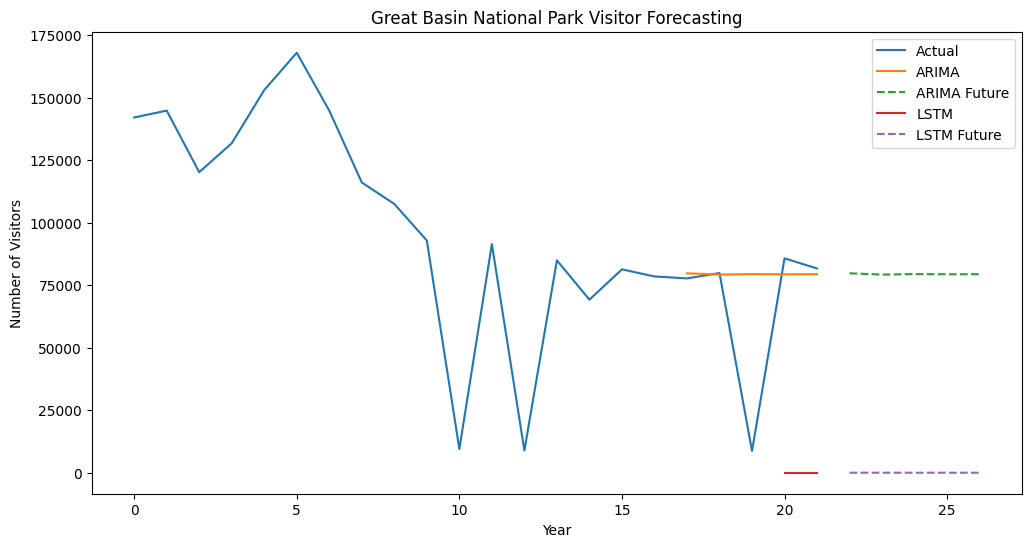

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 39ms/step


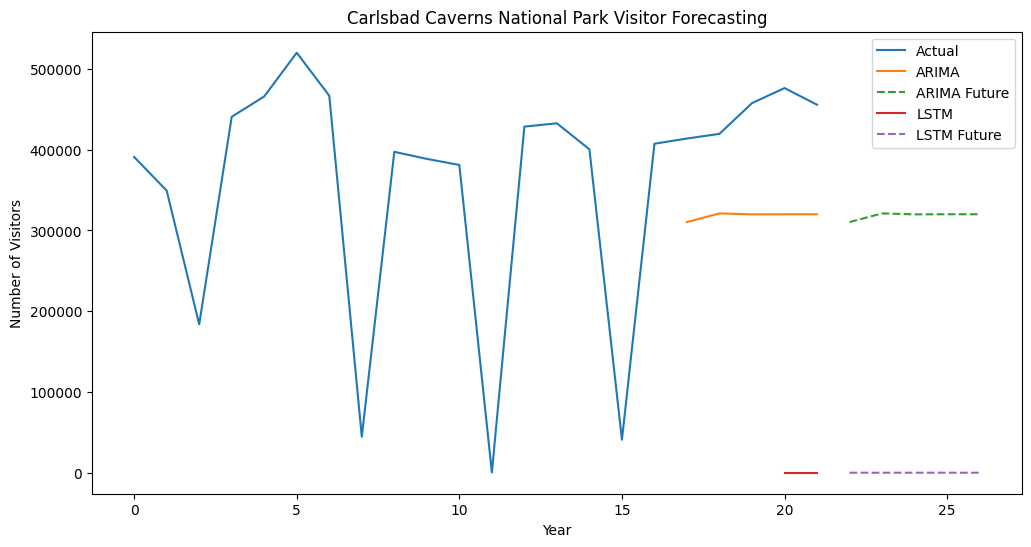

1/1 [==============================] - 0s 20ms/step


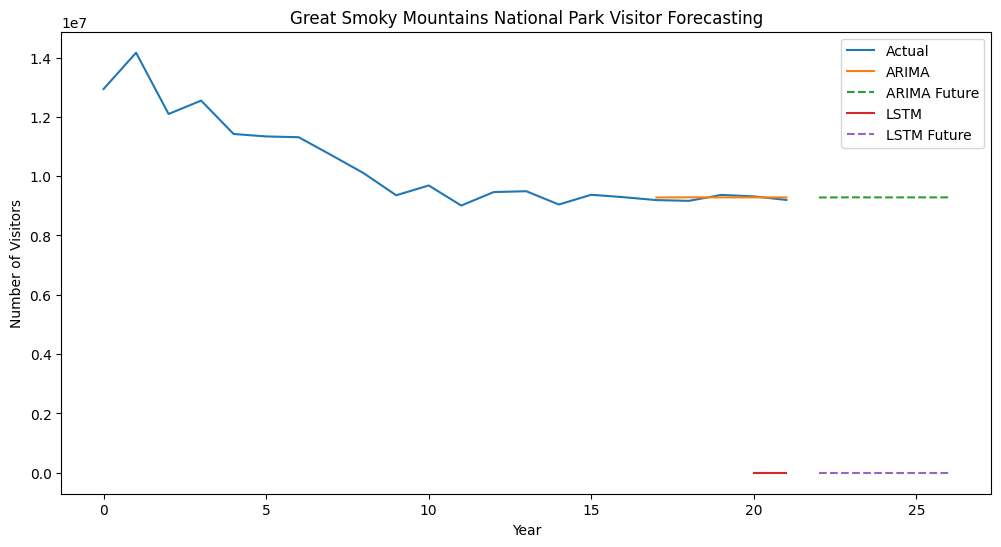

1/1 [==============================] - 0s 26ms/step


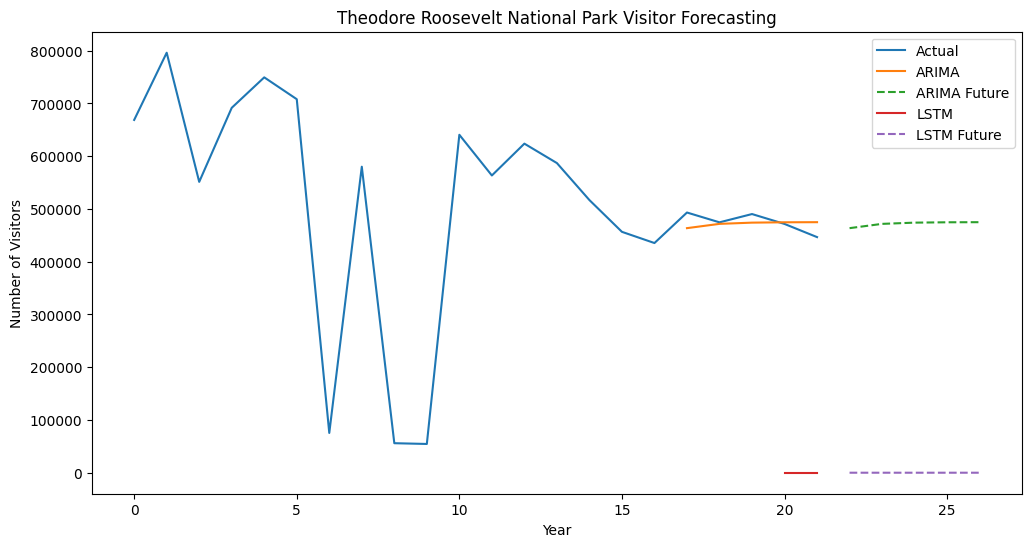

1/1 [==============================] - 0s 25ms/step


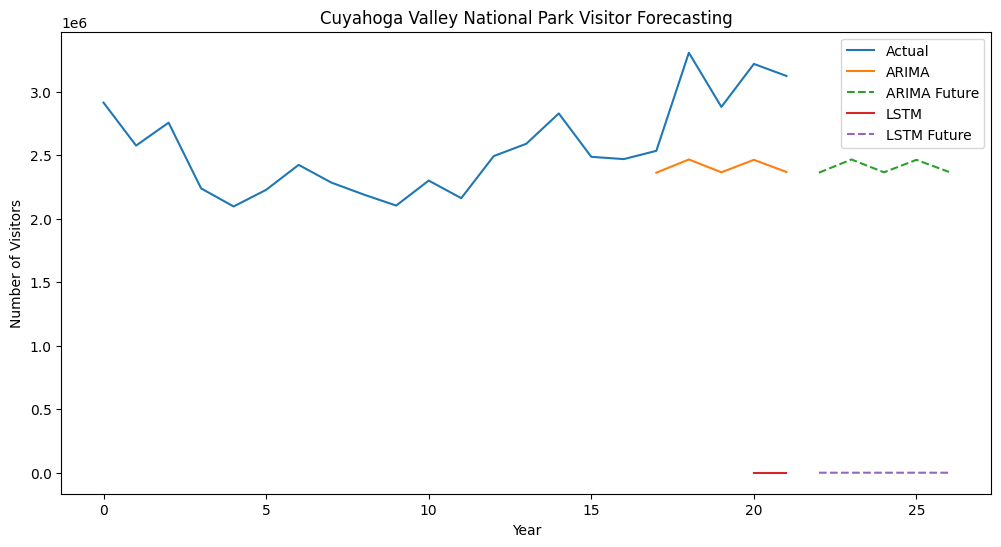

1/1 [==============================] - 0s 22ms/step


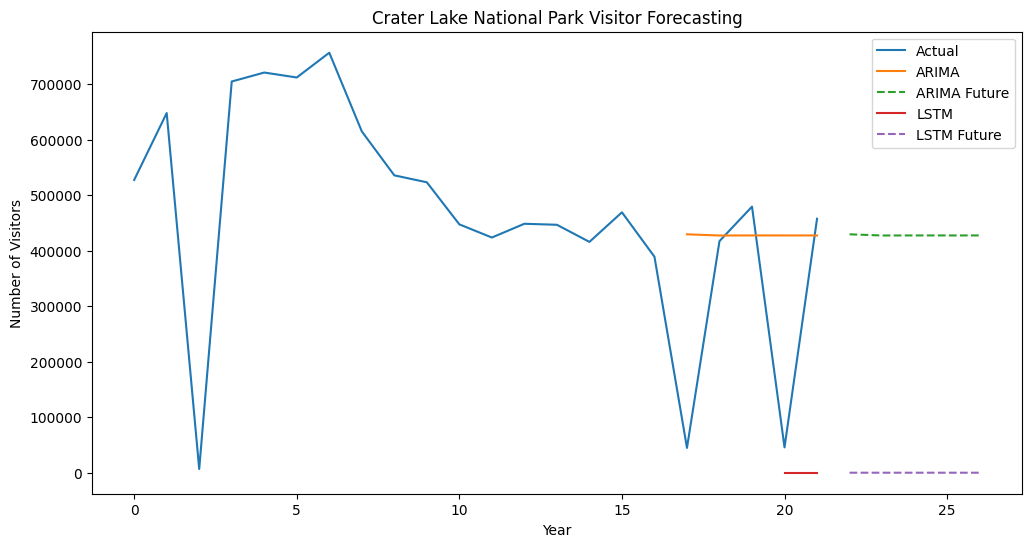

1/1 [==============================] - 0s 26ms/step


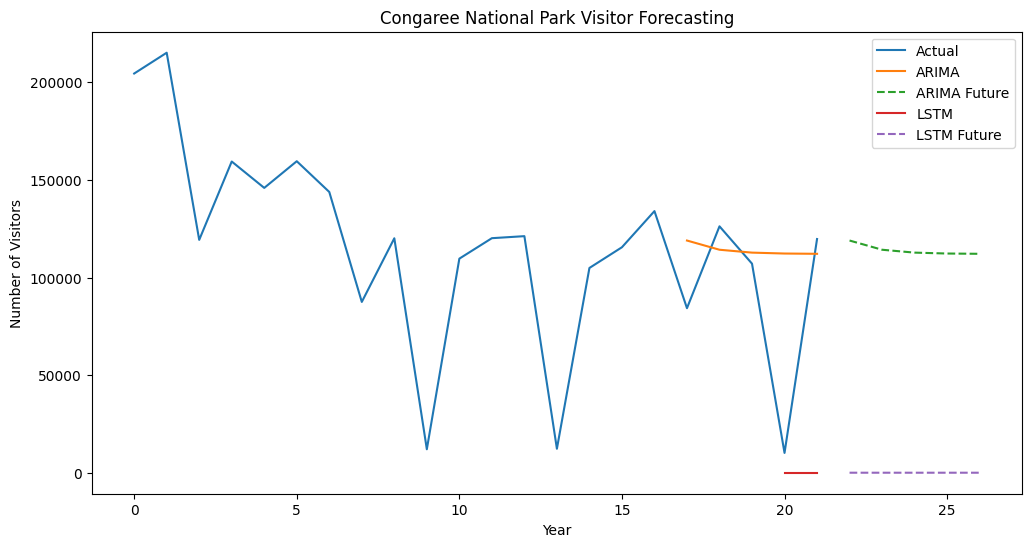

1/1 [==============================] - 0s 21ms/step


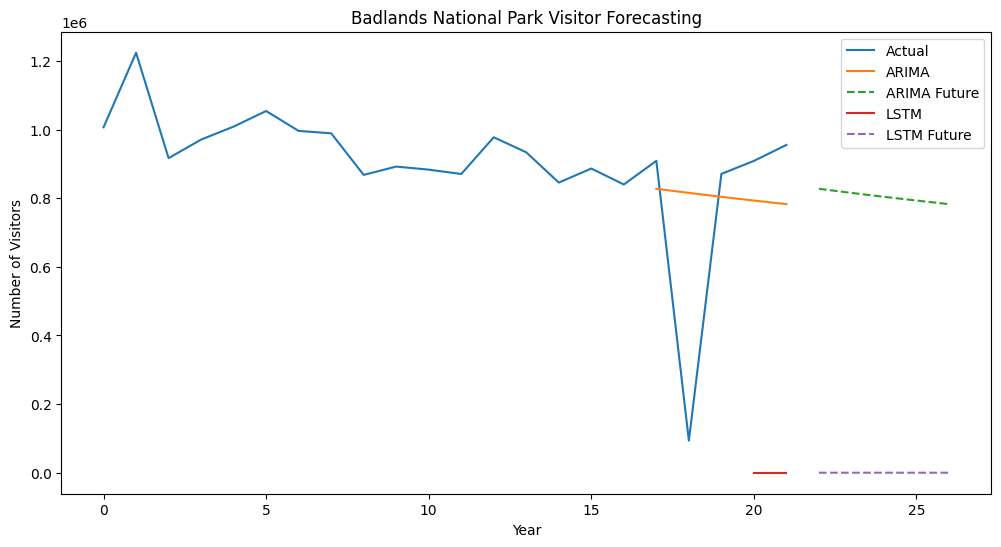

1/1 [==============================] - 0s 20ms/step


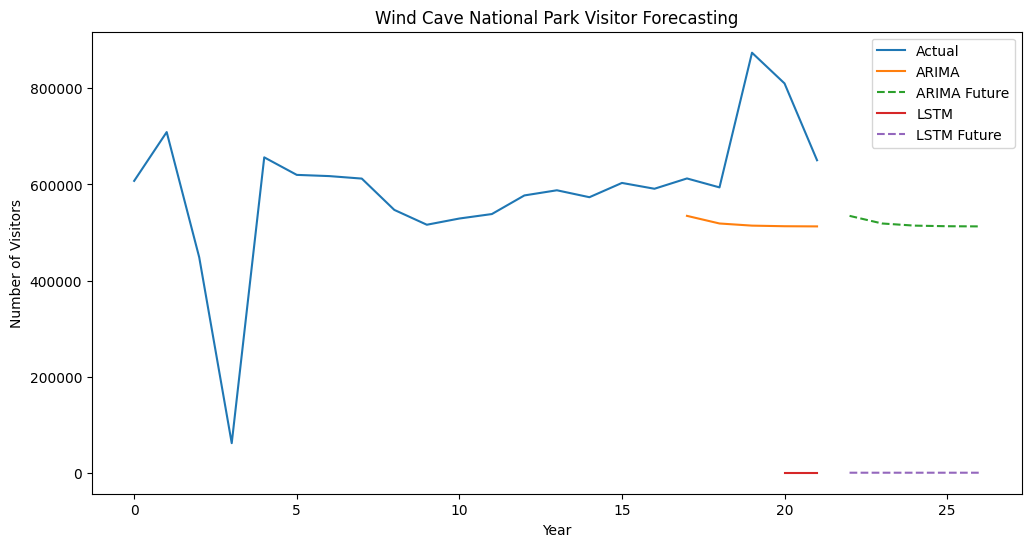

1/1 [==============================] - 0s 23ms/step


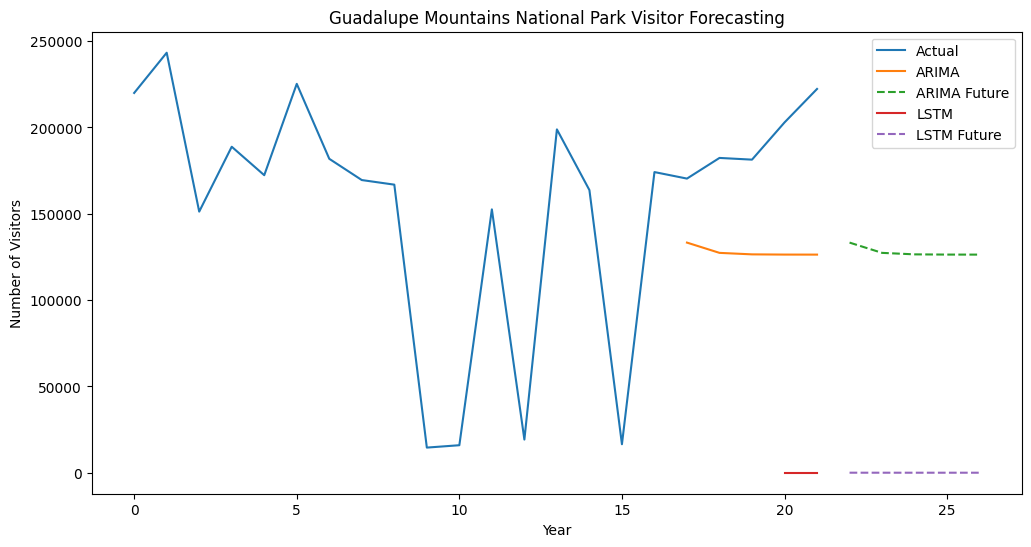

1/1 [==============================] - 0s 25ms/step


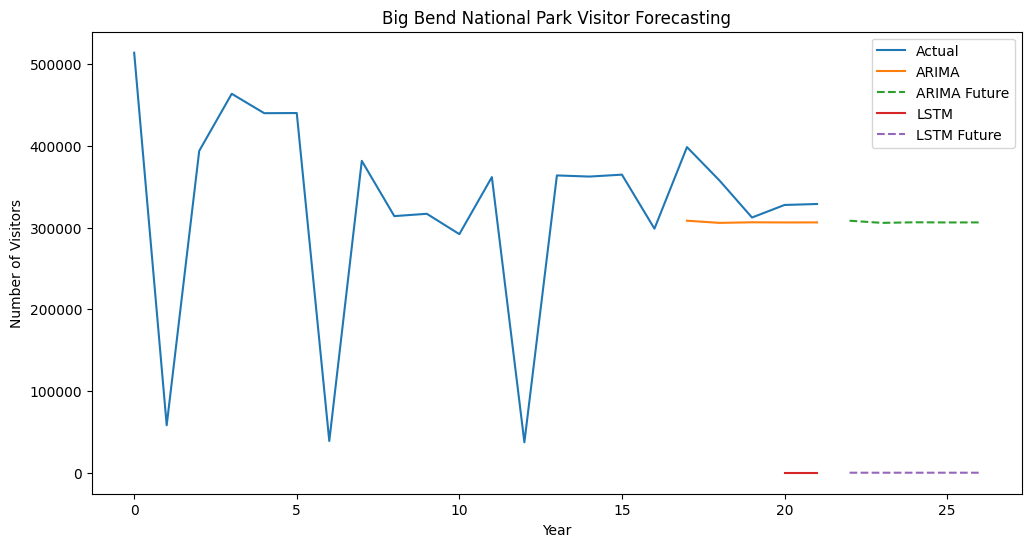

1/1 [==============================] - 0s 37ms/step


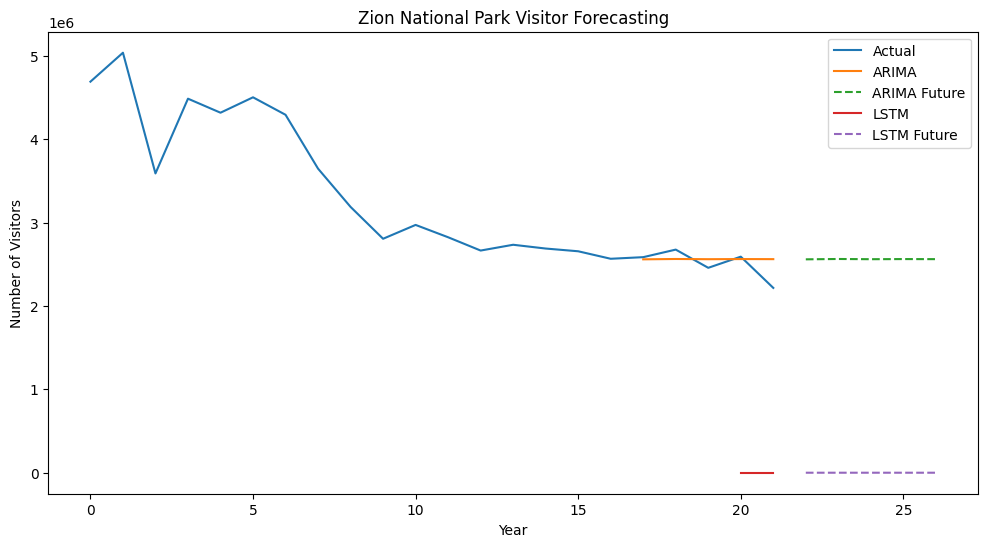

1/1 [==============================] - 0s 31ms/step


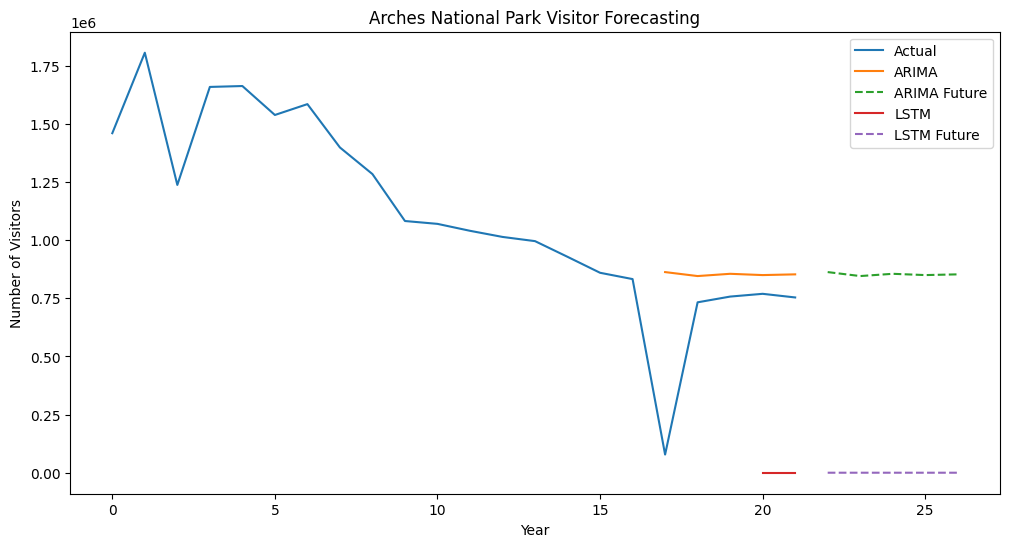

1/1 [==============================] - 0s 23ms/step


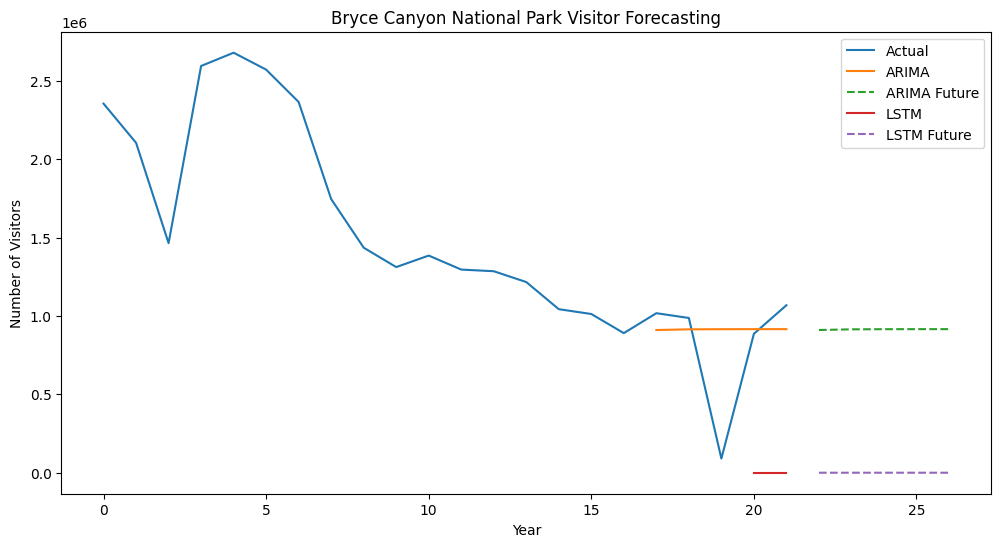

1/1 [==============================] - 0s 60ms/step


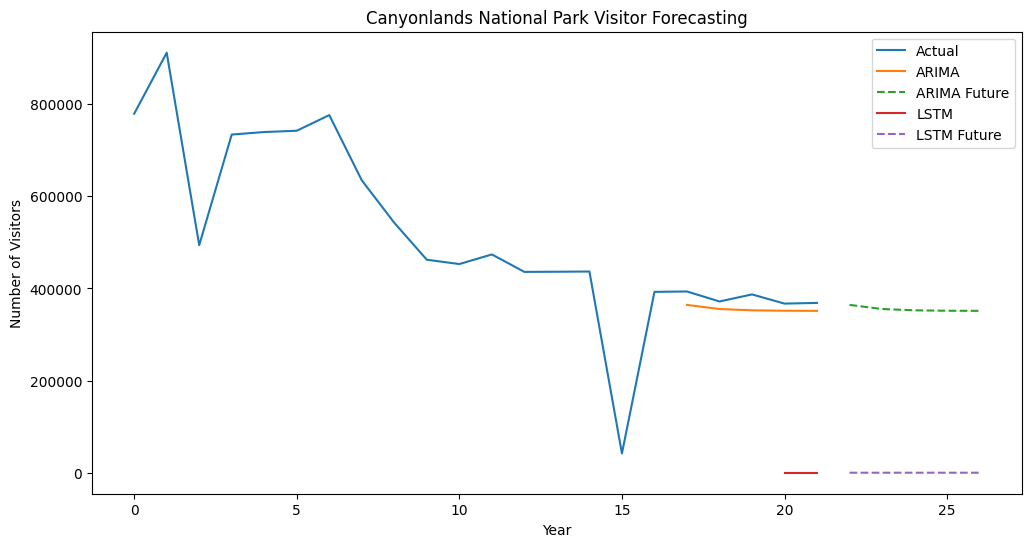

1/1 [==============================] - 0s 26ms/step


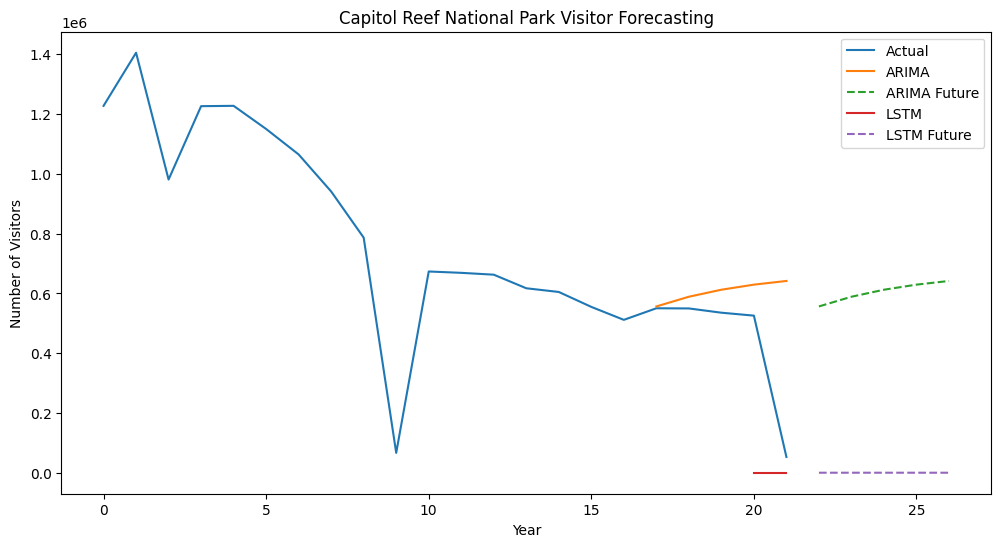

1/1 [==============================] - 0s 27ms/step


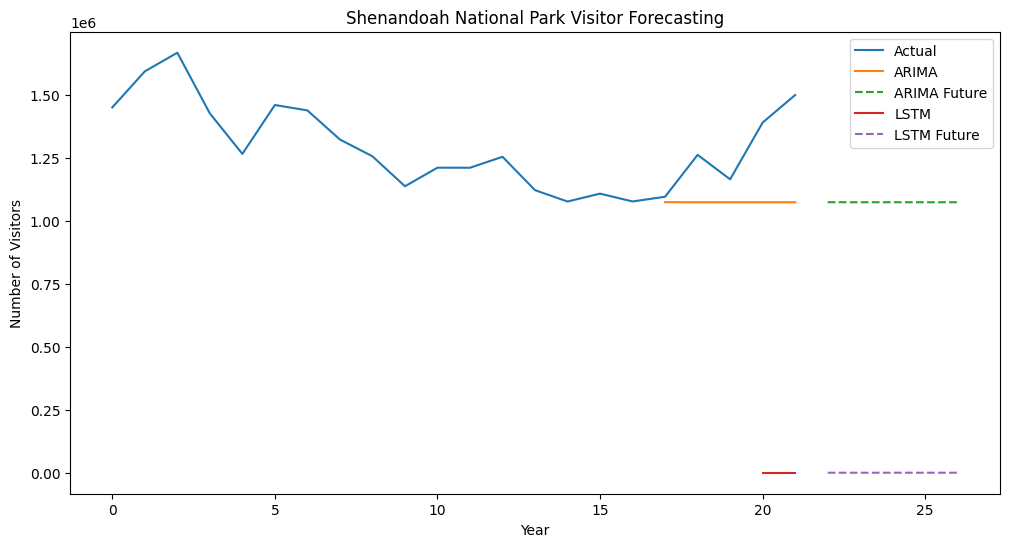

1/1 [==============================] - 0s 38ms/step


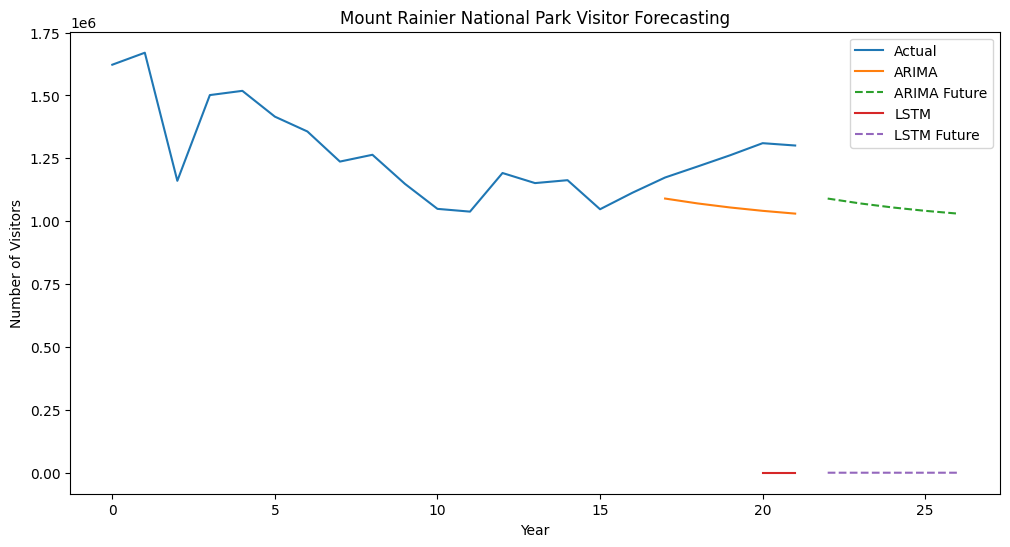

1/1 [==============================] - 0s 25ms/step


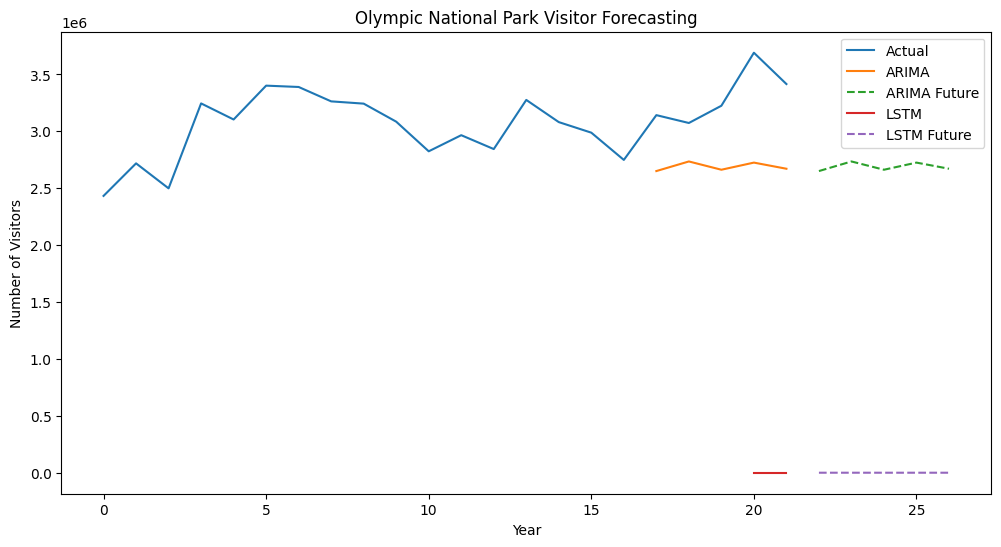

1/1 [==============================] - 0s 24ms/step


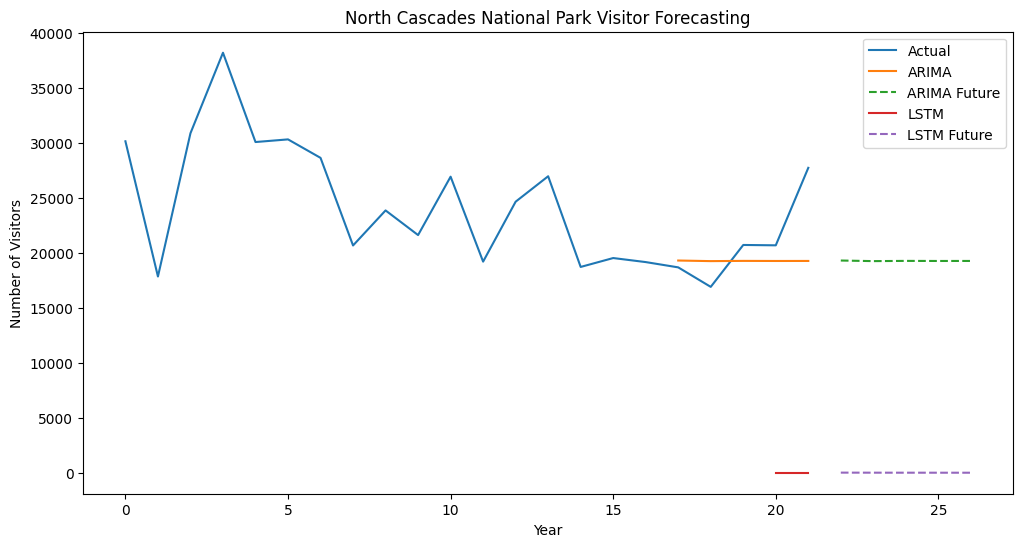

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 30ms/step


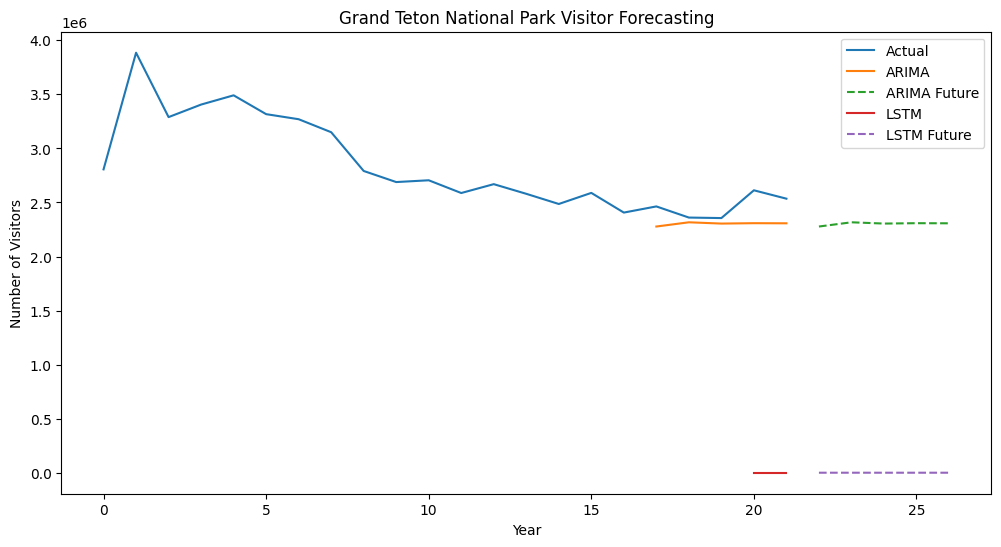

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 [==============================] - 0s 59ms/step


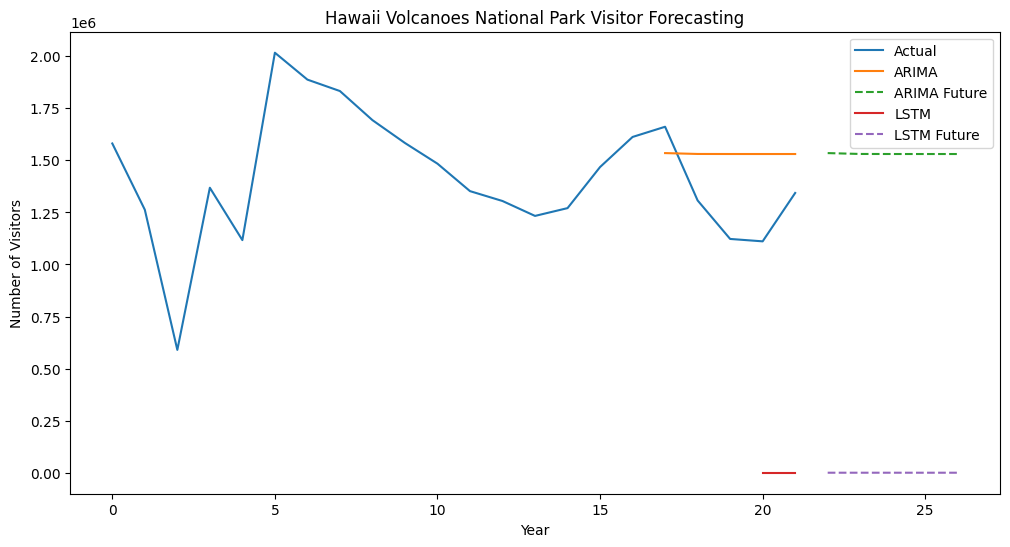

1/1 [==============================] - 0s 32ms/step


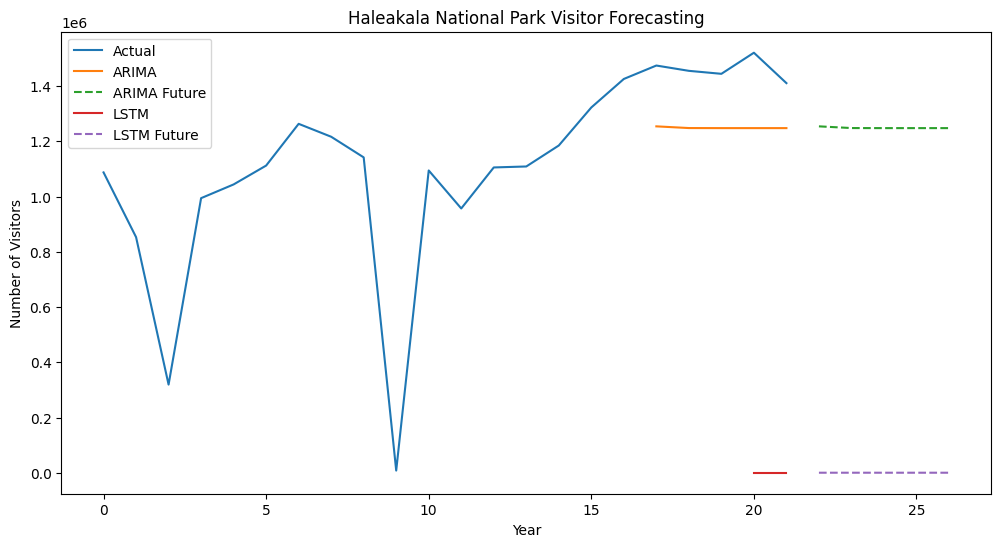

In [16]:
park_names = data['area_name'].unique()

# Iterate over each park
for park_name in park_names:
    park_data = data[data['area_name'] == park_name]
    years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']
    visits = park_data[years].values[0]

    train_size = int(len(visits) * 0.8)
    train, test = visits[:train_size], visits[train_size:]
    arima_model = ARIMA(train, order=(1, 1, 1))
    arima_results = arima_model.fit()
    arima_predictions = arima_results.forecast(steps=len(test))

    look_back = 3
    train_data = train.reshape(-1, 1)
    test_data = test.reshape(-1, 1)
    X_train, y_train = create_dataset(train_data, look_back)
    X_test, y_test = create_dataset(test_data, look_back)

    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
    lstm_model.add(Dense(1))
    lstm_model.compile(loss='mean_squared_error', optimizer='adam')
    lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

    #LSTM
    lstm_predictions = lstm_model.predict(X_test)
    arima_future_predictions = arima_results.forecast(steps=5)
    lstm_future_input = visits[-look_back:].reshape(1, look_back, 1)
    lstm_future_predictions = []
    for _ in range(5):
        prediction = lstm_model.predict(lstm_future_input)[0]
        lstm_future_predictions.append(prediction[0])
        lstm_future_input = np.append(lstm_future_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    #range of years for plotting
    years_range = range(len(visits))
    future_years_range = range(len(visits), len(visits) + 5)
    plt.figure(figsize=(12, 6))
    plt.plot(years_range, visits, label='Actual')
    plt.plot(range(len(train), len(visits)), arima_predictions, label='ARIMA')
    plt.plot(future_years_range, arima_future_predictions, linestyle='--', label='ARIMA Future')
    plt.plot(range(len(train) + look_back, len(visits)), lstm_predictions, label='LSTM')
    plt.plot(future_years_range, lstm_future_predictions, linestyle='--', label='LSTM Future')
    plt.xlabel('Year')
    plt.ylabel('Number of Visitors')
    plt.title(f'{park_name} Visitor Forecasting')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


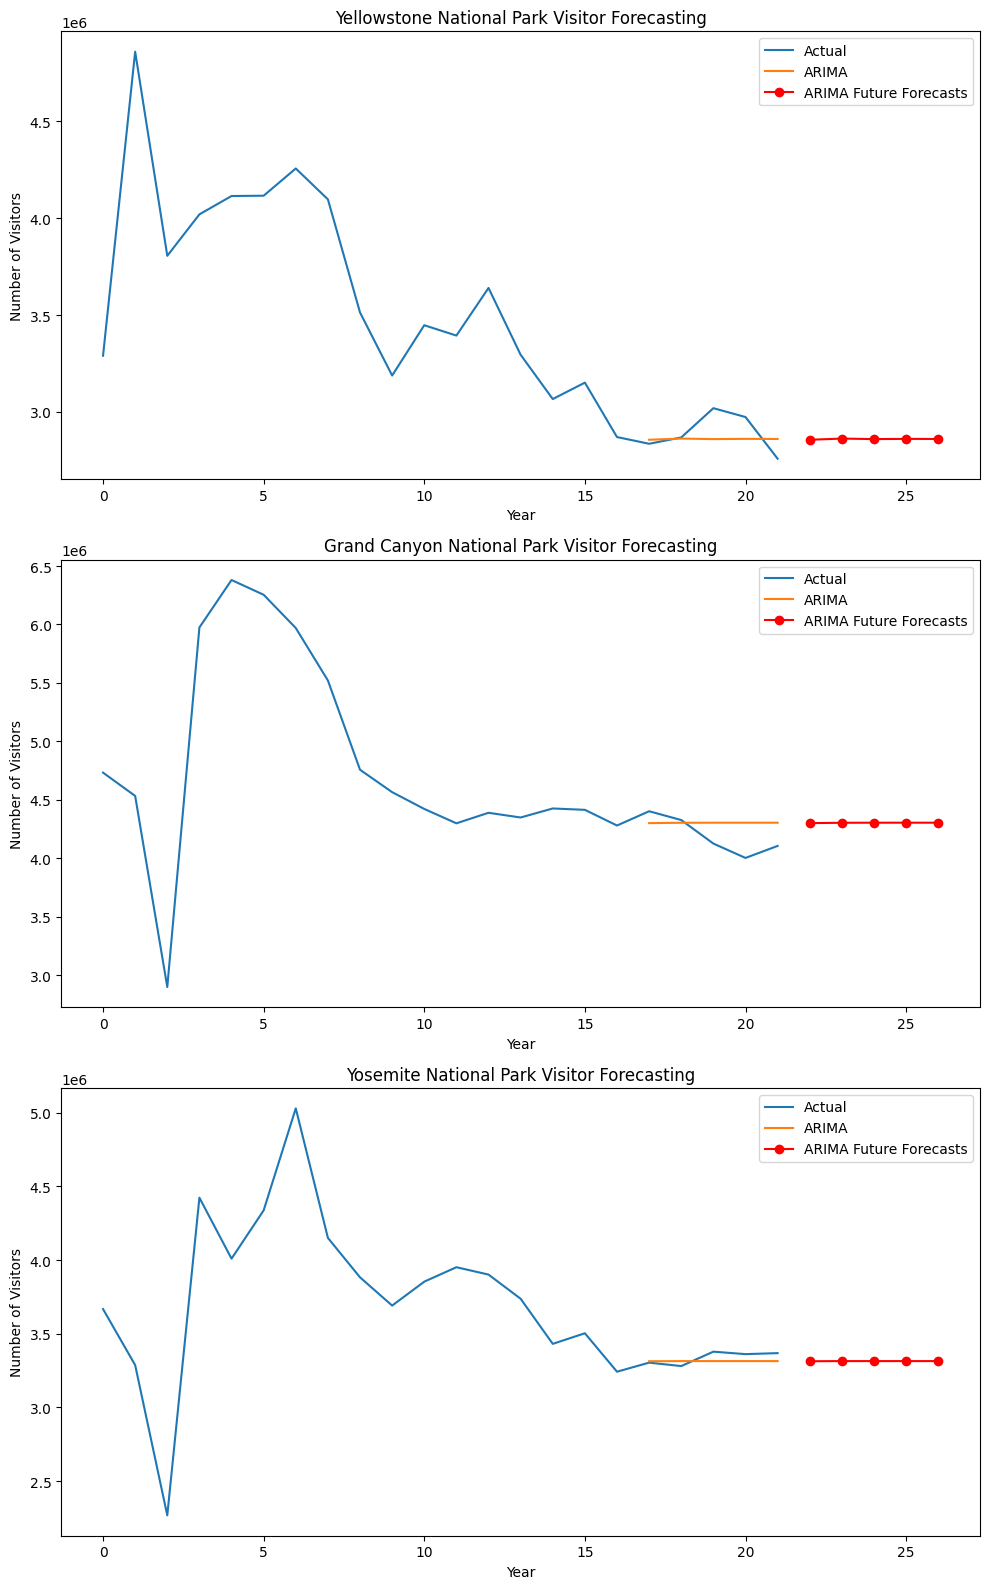

In [20]:
park_names = ['Yellowstone National Park', 'Grand Canyon National Park', 'Yosemite National Park']
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

for i, park_name in enumerate(park_names):
    park_data = data[data['area_name'] == park_name]

    years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']
    visits = park_data[years].values[0]

    #train and test sets
    train_size = int(len(visits) * 0.8)
    train, test = visits[:train_size], visits[train_size:]

    #ARIMA model
    arima_model = ARIMA(train, order=(1, 1, 1))
    arima_results = arima_model.fit()
    arima_predictions = arima_results.forecast(steps=len(test))
    arima_future_predictions = arima_results.forecast(steps=5)
    years_range = range(len(visits))
    future_years_range = range(len(visits), len(visits) + 5)
    axs[i].plot(years_range, visits, label='Actual')
    arima_pred_range = range(len(train), len(visits))
    axs[i].plot(arima_pred_range, arima_predictions, label='ARIMA')
    axs[i].plot(future_years_range, arima_future_predictions, 'ro-', label='ARIMA Future Forecasts')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Number of Visitors')
    axs[i].set_title(f'{park_name} Visitor Forecasting')
    axs[i].legend()

plt.tight_layout()
plt.show()